In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
%matplotlib inline

In [3]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

In [4]:
X = StandardScaler().fit_transform(X)

In [40]:
X.shape

(750, 2)

In [41]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

In [42]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [49]:
np.unique(core_samples_mask,return_counts=True)

(array([False,  True]), array([ 71, 679]))

In [48]:
core_samples_mask[db.core_sample_indices_] = True

In [50]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [ ]:
n_noise_ = list(labels).count(-1)

In [76]:
unique_labels

{-1, 0, 1, 2}

In [78]:
class_member_mask = (labels == k)


In [80]:
X[class_member_mask & core_samples_mask]

array([], shape=(0, 2), dtype=float64)

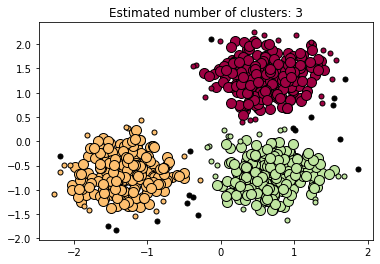

In [85]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
      for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


In [65]:
import matplotlib.pyplot as plt

In [68]:
plt.cm.Spectral([each for each in np.linspace(0, 1, len(set(labels)))]).shape

(4, 4)